In [1]:
#Formação Cientista de Dados - Fernando Amaral e Jones Granatyr 
#Limpeza e tratamento de Dados
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [6]:
agrupado = dataset.groupby(["Aparencia"]).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

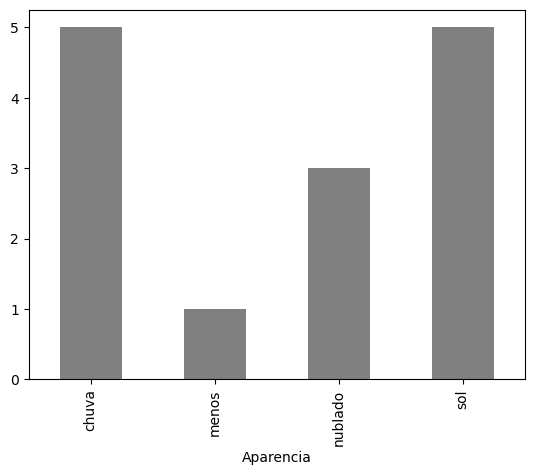

In [7]:
agrupado.plot.bar(color = "grey")

In [11]:
agrupado = dataset.groupby(["Vento"]).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

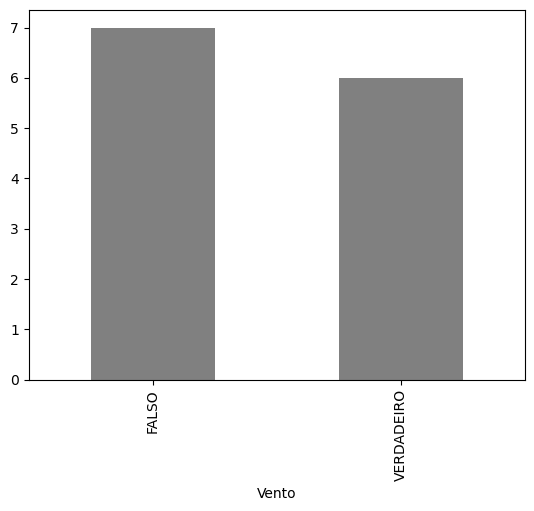

In [12]:
agrupado.plot.bar(color = "grey")

In [14]:
agrupado = dataset.groupby(["Jogar"]).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

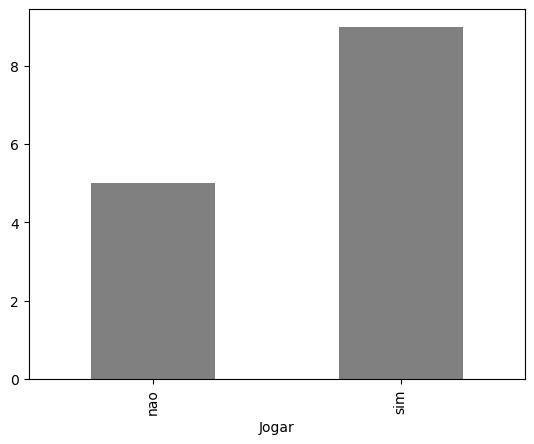

In [15]:
agrupado.plot.bar(color = "grey")

In [16]:
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

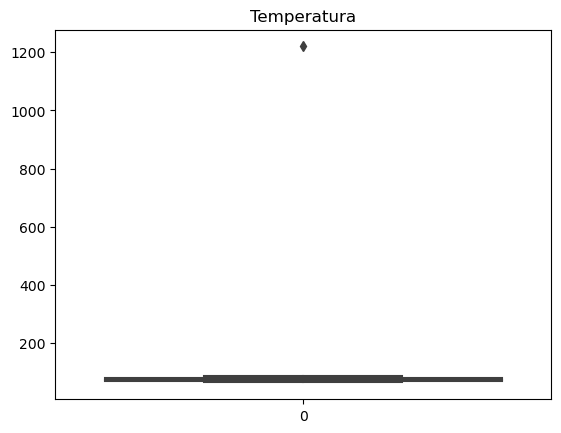

In [21]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\mateu\AppData\Local\Temp\ipykernel_5812\1502053818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Temperatura']).set_title('Temperatura')


Text(0.5, 1.0, 'Temperatura')

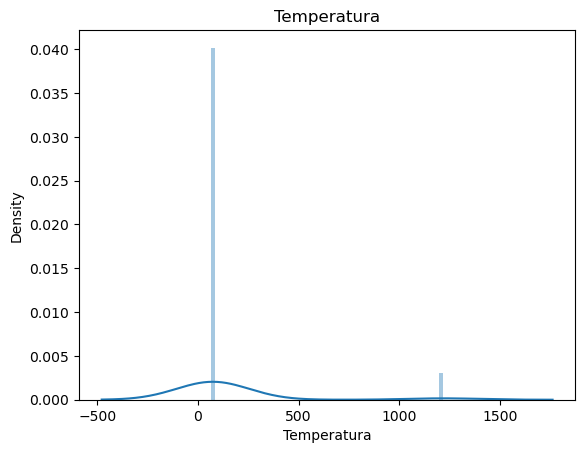

In [22]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [23]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

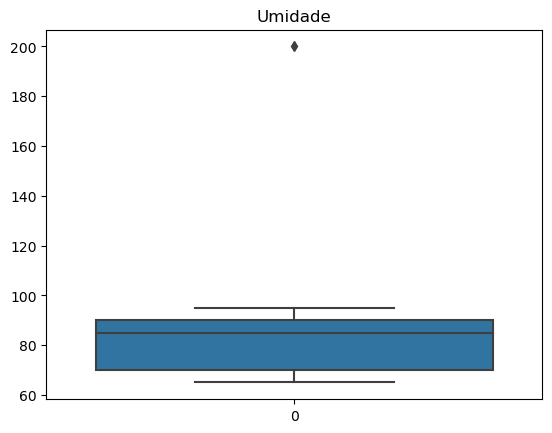

In [24]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\mateu\AppData\Local\Temp\ipykernel_5812\640715104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Umidade']).set_title('Umidade')


Text(0.5, 1.0, 'Umidade')

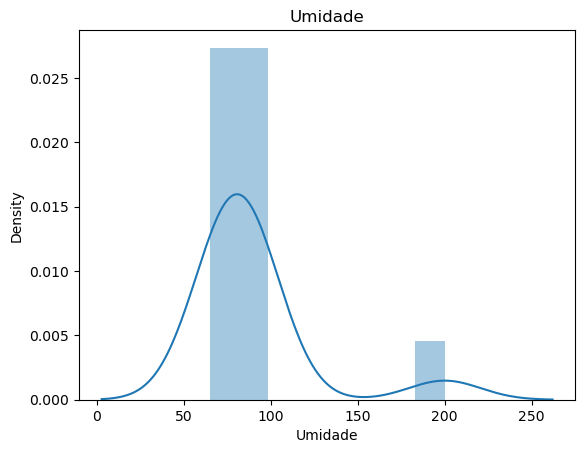

In [25]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [28]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [29]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [32]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

In [33]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [34]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [35]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [36]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [38]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130) , 'Temperatura'] = mediana

In [39]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [42]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [43]:
dataset['Umidade'].isnull().sum()

1

In [44]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [45]:
dataset['Umidade'].fillna(mediana, inplace=True)

In [46]:
dataset['Umidade'].isnull().sum()

0

In [47]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [48]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [49]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [51]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [52]:
dataset['Vento'].isnull().sum()

1

In [53]:
dataset['Vento'].fillna("FALSO", inplace=True)

In [54]:
dataset['Vento'].isnull().sum()

0